### Part 2 German

In [1]:
from scipy.io import arff
import pandas as pd
from GAN import GAN
from GAN_Twist import GAN_RF
from Dataset import Dataset
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


In [2]:
data = arff.loadarff('Assignment 4 files/german_credit.arff')
original_df = pd.DataFrame(data[0])
original_df

,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
0,b'A11',6.0,b'A34',b'A43',1169.0,b'A65',b'A75',4.0,b'A93',b'A101',...,b'A121',67.0,b'A143',b'A152',2.0,b'A173',1.0,b'A192',b'A201',b'1'
1,b'A12',48.0,b'A32',b'A43',5951.0,b'A61',b'A73',2.0,b'A92',b'A101',...,b'A121',22.0,b'A143',b'A152',1.0,b'A173',1.0,b'A191',b'A201',b'2'
2,b'A14',12.0,b'A34',b'A46',2096.0,b'A61',b'A74',2.0,b'A93',b'A101',...,b'A121',49.0,b'A143',b'A152',1.0,b'A172',2.0,b'A191',b'A201',b'1'
3,b'A11',42.0,b'A32',b'A42',7882.0,b'A61',b'A74',2.0,b'A93',b'A103',...,b'A122',45.0,b'A143',b'A153',1.0,b'A173',2.0,b'A191',b'A201',b'1'
4,b'A11',24.0,b'A33',b'A40',4870.0,b'A61',b'A73',3.0,b'A93',b'A101',...,b'A124',53.0,b'A143',b'A153',2.0,b'A173',2.0,b'A191',b'A201',b'2'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,b'A14',12.0,b'A32',b'A42',1736.0,b'A61',b'A74',3.0,b'A92',b'A101',...,b'A121',31.0,b'A143',b'A152',1.0,b'A172',1.0,b'A191',b'A201',b'1'
996,b'A11',30.0,b'A32',b'A41',3857.0,b'A61',b'A73',4.0,b'A91',b'A101',...,b'A122',40.0,b'A143',b'A152',1.0,b'A174',1.0,b'A192',b'A201',b'1'
997,b'A14',12.0,b'A32',b'A43',804.0,b'A61',b'A75',4.0,b'A93',b'A101',...,b'A123',38.0,b'A143',b'A152',1.0,b'A173',1.0,b'A191',b'A201',b'1'
998,b'A11',45.0,b'A32',b'A43',1845.0,b'A61',b'A73',4.0,b'A93',b'A101',...,b'A124',23.0,b'A143',b'A153',1.0,b'A173',1.0,b'A192',b'A201',b'2'


In [3]:
columns = original_df.columns

In [4]:
import re
for column in columns:
    if original_df[column].dtype == object:
        original_df[column] = original_df[column].apply(lambda x: x.decode("utf-8"))

In [5]:
data = arff.loadarff('Assignment 4 files/german_credit.arff')
df = pd.DataFrame(data[0])
df

,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
0,b'A11',6.0,b'A34',b'A43',1169.0,b'A65',b'A75',4.0,b'A93',b'A101',...,b'A121',67.0,b'A143',b'A152',2.0,b'A173',1.0,b'A192',b'A201',b'1'
1,b'A12',48.0,b'A32',b'A43',5951.0,b'A61',b'A73',2.0,b'A92',b'A101',...,b'A121',22.0,b'A143',b'A152',1.0,b'A173',1.0,b'A191',b'A201',b'2'
2,b'A14',12.0,b'A34',b'A46',2096.0,b'A61',b'A74',2.0,b'A93',b'A101',...,b'A121',49.0,b'A143',b'A152',1.0,b'A172',2.0,b'A191',b'A201',b'1'
3,b'A11',42.0,b'A32',b'A42',7882.0,b'A61',b'A74',2.0,b'A93',b'A103',...,b'A122',45.0,b'A143',b'A153',1.0,b'A173',2.0,b'A191',b'A201',b'1'
4,b'A11',24.0,b'A33',b'A40',4870.0,b'A61',b'A73',3.0,b'A93',b'A101',...,b'A124',53.0,b'A143',b'A153',2.0,b'A173',2.0,b'A191',b'A201',b'2'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,b'A14',12.0,b'A32',b'A42',1736.0,b'A61',b'A74',3.0,b'A92',b'A101',...,b'A121',31.0,b'A143',b'A152',1.0,b'A172',1.0,b'A191',b'A201',b'1'
996,b'A11',30.0,b'A32',b'A41',3857.0,b'A61',b'A73',4.0,b'A91',b'A101',...,b'A122',40.0,b'A143',b'A152',1.0,b'A174',1.0,b'A192',b'A201',b'1'
997,b'A14',12.0,b'A32',b'A43',804.0,b'A61',b'A75',4.0,b'A93',b'A101',...,b'A123',38.0,b'A143',b'A152',1.0,b'A173',1.0,b'A191',b'A201',b'1'
998,b'A11',45.0,b'A32',b'A43',1845.0,b'A61',b'A73',4.0,b'A93',b'A101',...,b'A124',23.0,b'A143',b'A153',1.0,b'A173',1.0,b'A192',b'A201',b'2'


In [6]:
columns = df.columns

In [7]:
import re
for column in columns:
    if df[column].dtype == object:
        df[column] = df[column].apply(lambda x: x.decode("utf-8"))
        df[column] = df[column].apply(lambda v: int(re.findall('[0-9]+', v)[0]))

In [8]:
df

,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
0,11,6.0,34,43,1169.0,65,75,4.0,93,101,...,121,67.0,143,152,2.0,173,1.0,192,201,1
1,12,48.0,32,43,5951.0,61,73,2.0,92,101,...,121,22.0,143,152,1.0,173,1.0,191,201,2
2,14,12.0,34,46,2096.0,61,74,2.0,93,101,...,121,49.0,143,152,1.0,172,2.0,191,201,1
3,11,42.0,32,42,7882.0,61,74,2.0,93,103,...,122,45.0,143,153,1.0,173,2.0,191,201,1
4,11,24.0,33,40,4870.0,61,73,3.0,93,101,...,124,53.0,143,153,2.0,173,2.0,191,201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,14,12.0,32,42,1736.0,61,74,3.0,92,101,...,121,31.0,143,152,1.0,172,1.0,191,201,1
996,11,30.0,32,41,3857.0,61,73,4.0,91,101,...,122,40.0,143,152,1.0,174,1.0,192,201,1
997,14,12.0,32,43,804.0,61,75,4.0,93,101,...,123,38.0,143,152,1.0,173,1.0,191,201,1
998,11,45.0,32,43,1845.0,61,73,4.0,93,101,...,124,23.0,143,153,1.0,173,1.0,192,201,2


In [9]:

# class_col = df['21']
# df = df.drop(columns=['21'], axis=1)
scaler = MinMaxScaler((-1, 1))
scaler.fit(df.values)
df = pd.DataFrame(scaler.transform(df.values), columns=df.columns)
# df = pd.concat([df, class_col],axis=1)
df

,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
0,-1.000000,-0.941176,1.0,-0.983784,-0.898867,1.0,1.0,1.000000,0.333333,-1.0,...,-1.000000,0.714286,1.0,0.0,-0.333333,0.333333,-1.0,1.0,-1.0,-1.0
1,-0.333333,0.294118,0.0,-0.983784,-0.372620,-1.0,0.0,-0.333333,-0.333333,-1.0,...,-1.000000,-0.892857,1.0,0.0,-1.000000,0.333333,-1.0,-1.0,-1.0,1.0
2,1.000000,-0.764706,1.0,-0.967568,-0.796853,-1.0,0.5,-0.333333,0.333333,-1.0,...,-1.000000,0.071429,1.0,0.0,-1.000000,-0.333333,1.0,-1.0,-1.0,-1.0
3,-1.000000,0.117647,0.0,-0.989189,-0.160119,-1.0,0.5,-0.333333,0.333333,1.0,...,-0.333333,-0.071429,1.0,1.0,-1.000000,0.333333,1.0,-1.0,-1.0,-1.0
4,-1.000000,-0.411765,0.5,-1.000000,-0.491581,-1.0,0.0,0.333333,0.333333,-1.0,...,1.000000,0.214286,1.0,1.0,-0.333333,0.333333,1.0,-1.0,-1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.000000,-0.764706,0.0,-0.989189,-0.836470,-1.0,0.5,0.333333,-0.333333,-1.0,...,-1.000000,-0.571429,1.0,0.0,-1.000000,-0.333333,-1.0,-1.0,-1.0,-1.0
996,-1.000000,-0.235294,0.0,-0.994595,-0.603059,-1.0,0.0,1.000000,-1.000000,-1.0,...,-0.333333,-0.250000,1.0,0.0,-1.000000,1.000000,-1.0,1.0,-1.0,-1.0
997,1.000000,-0.764706,0.0,-0.983784,-0.939034,-1.0,1.0,1.000000,0.333333,-1.0,...,0.333333,-0.321429,1.0,0.0,-1.000000,0.333333,-1.0,-1.0,-1.0,-1.0
998,-1.000000,0.205882,0.0,-0.983784,-0.824475,-1.0,0.0,1.000000,0.333333,-1.0,...,1.000000,-0.857143,1.0,1.0,-1.000000,0.333333,-1.0,1.0,-1.0,1.0


In [10]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size=0.30, random_state=42)
print(f'train shape: {X_train.shape}')
print(f'test shape: {X_test.shape}')

train shape: (700, 20)
test shape: (300, 20)


In [11]:
clf = RandomForestClassifier(max_depth=3, random_state=0)
clf.fit(X_train.values, y_train.values)

RandomForestClassifier(max_depth=3, random_state=0)

C:\Users\amits\Anaconda3\envs\home\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


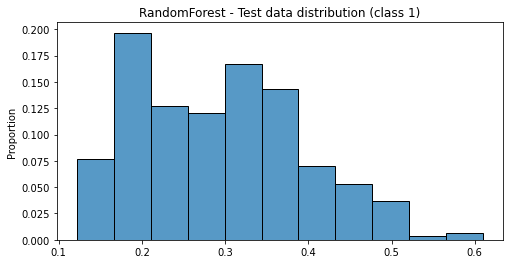

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(8, 4))
confidence_score = clf.predict_proba(X_test)[:, 1]
sns.histplot(confidence_score, stat='proportion')
ax.set_title('RandomForest - Test data distribution (class 1)')
plt.show()

In [13]:
#Define the GAN and training parameters
noise_dim = 5
dim = 10
batch_size = 32

log_step = 100
epochs = 5000+1
learning_rate = 5e-4
models_dir = 'part2_model_german'
C = 0.7

gan_args = [batch_size, learning_rate, noise_dim, df.shape[1], dim, C]
train_args = [models_dir, epochs, log_step]

model = GAN_RF

#Training the GAN model chosen: Vanilla GAN, CGAN, DCGAN, etc.
synthesizer = model(gan_args, clf)

In [14]:
history = synthesizer.train(df, train_args)

0 [D loss: 0.677756, acc.: 39.06%] [G loss: 0.620295]
100 [D loss: 0.597512, acc.: 64.06%] [G loss: 0.684624]
200 [D loss: 0.725168, acc.: 57.81%] [G loss: 0.743404]
300 [D loss: 0.703957, acc.: 54.69%] [G loss: 1.025486]
400 [D loss: 0.634300, acc.: 56.25%] [G loss: 0.659726]
500 [D loss: 0.661044, acc.: 59.38%] [G loss: 1.013098]
600 [D loss: 0.629880, acc.: 67.19%] [G loss: 0.825938]
700 [D loss: 0.570393, acc.: 75.00%] [G loss: 0.885353]
800 [D loss: 0.605499, acc.: 70.31%] [G loss: 0.731753]
900 [D loss: 0.560785, acc.: 79.69%] [G loss: 0.953991]
1000 [D loss: 0.465340, acc.: 76.56%] [G loss: 0.833666]
1100 [D loss: 0.606215, acc.: 70.31%] [G loss: 0.888939]
1200 [D loss: 0.708682, acc.: 51.56%] [G loss: 0.809291]
1300 [D loss: 0.585135, acc.: 73.44%] [G loss: 0.863110]
1400 [D loss: 0.532969, acc.: 81.25%] [G loss: 0.914452]
1500 [D loss: 0.451006, acc.: 85.94%] [G loss: 0.896769]
1600 [D loss: 0.617570, acc.: 67.19%] [G loss: 0.943461]
1700 [D loss: 0.541588, acc.: 76.56%] [G lo

In [15]:
from sklearn.decomposition import PCA

In [16]:
scalar = PCA(n_components=2, svd_solver='full')
scalar.fit(df.values)
X_embedded = scalar.transform(df.values)

In [17]:
import matplotlib.pyplot as plt
import numpy as np


# Setup parameters visualization parameters
seed = 17
test_size = 1000 # number of fraud cases

np.random.seed(seed)
z = np.random.normal(size=(test_size, noise_dim))
real = synthesizer.get_data_batch(train=df, batch_size=test_size, seed=seed)
real_samples = pd.DataFrame(real)

In [18]:
models = {'GAN': ['GAN', False, synthesizer.generator]}

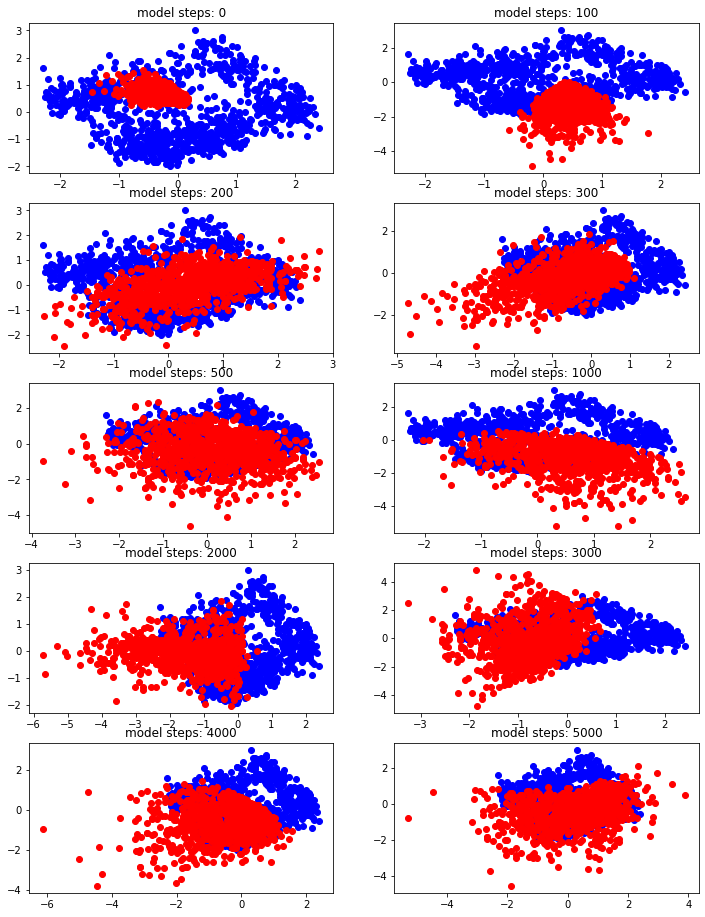

In [19]:
model_names = ['GAN']
colors = ['deepskyblue','blue']
markers = ['o','^']

col1, col2 = 'CITY', 'ETHNICITY'

base_dir = 'model/'

#Actual fraud data visualization
model_steps = [ 0, 100, 200, 300, 500, 1000, 2000, 3000, 4000, 5000]
rows = len(model_steps)
columns = 5

axarr = [[]]*len(model_steps)



fig, ax = plt.subplots(5, 2, figsize=(12, 16))


for model_step_ix, model_step in enumerate(model_steps):      
    [model_name, with_class, generator_model] = models['GAN']
    generator_model.load_weights( base_dir + '_generator_model_weights_step_'+str(model_step)+'.h5')
    g_z = generator_model.predict([z, np.random.uniform(0, 1, test_size)])
    g_z_emb = scalar.transform(g_z)
    ax[model_step_ix // 2, model_step_ix % 2].scatter(X_embedded[:,0], X_embedded[:,1], c='b')
    ax[model_step_ix // 2, model_step_ix % 2].scatter(g_z_emb[:, 0], g_z_emb[:, 1], c='r')
    ax[model_step_ix // 2, model_step_ix % 2].set_title(f'model steps: {model_step}')

C:\Users\amits\Anaconda3\envs\home\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


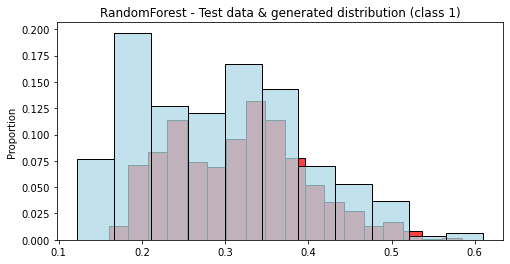

In [20]:
g_z__confidence_score_1 = clf.predict_proba(g_z[:, :-1])[:, 1]
confidence_score_1 = clf.predict_proba(X_test)[:, 1]


fig, ax = plt.subplots(figsize=(8, 4))
sns.histplot(g_z__confidence_score_1, stat='proportion', color='red')
sns.histplot(confidence_score_1, stat='proportion', color='lightblue')
ax.set_title('RandomForest - Test data & generated distribution (class 1)')
plt.show()

C:\Users\amits\Anaconda3\envs\home\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


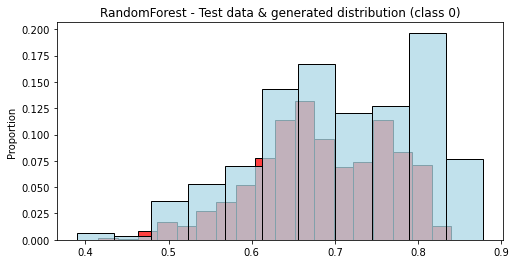

In [21]:
g_z__confidence_score_0 = clf.predict_proba(g_z[:, :-1])[:, 0]
confidence_score_0 = clf.predict_proba(X_test)[:, 0]

fig, ax = plt.subplots(figsize=(8, 4))
sns.histplot(g_z__confidence_score_0, stat='proportion', color='red')
sns.histplot(confidence_score_0, stat='proportion', color='lightblue')
ax.set_title('RandomForest - Test data & generated distribution (class 0)')
plt.show()